In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

In [2]:
stem = "/home/ubuntu/U-net-/RG_IncuCyte_HT1080_Images/phase/"
stem_label = "/home/ubuntu/U-net-/RG_IncuCyte_HT1080_Images/mark/"

In [3]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(stem) if isfile(join(stem, f))]

In [4]:
imgNames = os.listdir(stem)
imgNames.sort()
labelImgNames = os.listdir(stem_label)
labelImgNames.sort()

numImages = 50
numRows = 256
numCols = 256
X_train = np.zeros((numImages,numRows,numCols,1))
Y_train = np.zeros(X_train.shape)

for i in range(numImages): 
    fname = stem + imgNames[i]
    img = plt.imread(fname)
    img = img[:,:,0]
    X_train[i,:,:,0] = img[0:numRows,0:numCols]
    
    
    fname = stem_label + labelImgNames[i]
    img = plt.imread(fname) 
    img = img[:,:,0]
    Y_train[i,:,:,0] = img[0:numRows,0:numCols]

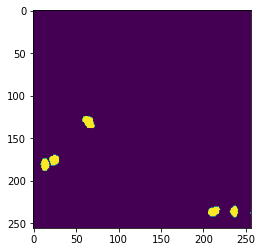

In [5]:
plt.imshow(Y_train[0,:,:,0])

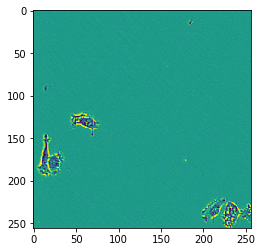

In [6]:
plt.imshow(X_train[0,:,:,0])


In [8]:
inputs = Input((numRows, numCols, 1))
conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(inputs)
conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool1)
conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool2)
conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv3)
pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool3)
conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv4)
pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(pool4)
conv5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same',kernel_initializer = 'he_normal')(conv5)

up6 = layers.concatenate([layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
conv6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

up7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

up8 = layers.concatenate([layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

up9 = layers.concatenate([layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])

model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train,Y_train, epochs = 5, batch_size = 4)

Epoch 1/5
50/50 [==============================] - 5s 99ms/sample - loss: -873010.1053 - acc: 2.7161e-04
Epoch 2/5
50/50 [==============================] - 4s 85ms/sample - loss: -48958499536.9600 - acc: 2.6550e-04
Epoch 3/5
50/50 [==============================] - 4s 85ms/sample - loss: -388381338228490.2500 - acc: 2.6550e-04
Epoch 4/5
50/50 [==============================] - 4s 84ms/sample - loss: -640044902493758336.0000 - acc: 2.6550e-04
Epoch 5/5
50/50 [==============================] - 4s 85ms/sample - loss: nan - acc: 0.3258            


In [9]:
X_test = np.zeros((1,numRows,numCols,1))
#imgName = imgNames[numImages+1]
imgName = imgNames[5]
testImg = plt.imread(stem + imgName)
testImg = testImg[:,:,0]
X_test[0,:,:,0] = testImg[0:numRows,0:numCols]
X_test = X_test/255.0

In [10]:
check = model.predict(X_test)
predictions = check > .5

<Figure size 432x288 with 0 Axes>

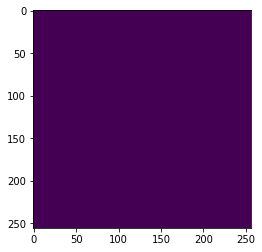

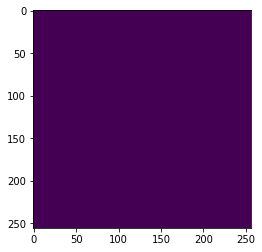

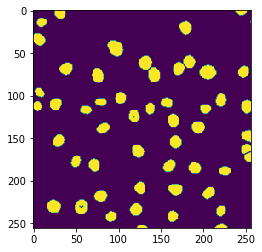

<Figure size 432x288 with 0 Axes>

In [46]:
plt.imshow(check[0,:,:,0])
plt.figure()
plt.imshow(predictions[0,:,:,0])
plt.figure()
plt.imshow(Y_train[21,:,:,0])
plt.figure()

In [33]:
print(Y_train[15,0:20,250:270,0])


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


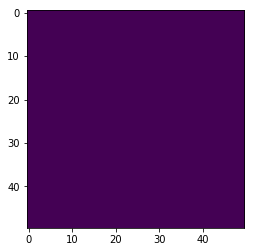

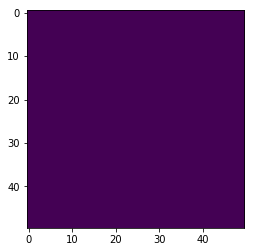

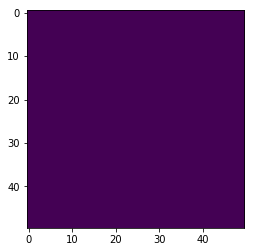

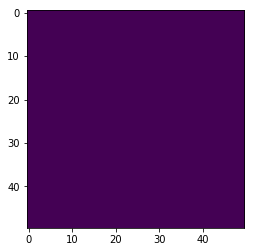

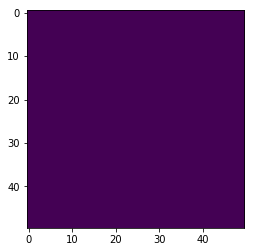

In [41]:
for i in range(5):
    plt.figure()
    #plt.imshow(Y_train[15,:,:,0])
    plt.imshow(Y_train[15,0:i+50,i:i+50,0])
    #print (Y_train[15,45:55,i:i+10,0])

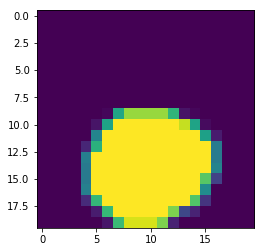

In [47]:
plt.imshow(Y_train[21,0:20,0:20,0])

In [ ]:
print()